Biscuit Sales Analysis

In [25]:
# Loading libraries
import pandas as pd #Data manipulation, analysis, and handling structured data
import numpy as np #Numerical computations
import seaborn as sb #Data Visualizations
import matplotlib.pyplot as plt #Plots

Load the Dataset

In [26]:
# Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#Loading dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Sales.xlsx'

sales = pd.read_excel(dataset_path)



Undestand the Data - Preview dataset

In [33]:
#Display top 5 rows
sales.head()

,DATE,PRODUCTID,PRODUCT NAME,QUANTITY,SALE TYPE,PAYMENT MODE,Buying Price,SELLING PRICE,SALE WORTH
0,2021-01-01,BISC006,Double Chocolate Biscuits,9,Wholesaler,Online,4,9,81
1,2021-01-02,BISC010,Oatmeal Raisin Biscuits,15,Online,Cash,2,8,120
2,2021-01-02,BISC004,Classic Butter Biscuits,6,Direct Sales,Cash,2,8,48
3,2021-01-03,BISC001,Almond Shortbread Biscuits,5,Direct Sales,Online,5,10,50
4,2021-01-04,BISC009,Mint Chocolate Biscuits,12,Online,Online,5,10,120


In [34]:
# Display bottom 10 of the data

sales.tail(10)

,DATE,PRODUCTID,PRODUCT NAME,QUANTITY,SALE TYPE,PAYMENT MODE,Buying Price,SELLING PRICE,SALE WORTH
517,2022-12-19,BISC012,Raspberry Biscuits,7,Direct Sales,Online,4,9,63
518,2022-12-19,BISC003,Cinnamon Sugar Biscuits,14,Direct Sales,Cash,4,9,126
519,2022-12-19,BISC003,Cinnamon Sugar Biscuits,11,Online,Online,4,9,99
520,2022-12-21,BISC002,Chocolate Chip Biscuits,10,Direct Sales,Online,2,8,80
521,2022-12-29,BISC002,Chocolate Chip Biscuits,15,Direct Sales,Online,2,8,120
522,2022-12-29,BISC011,Peanut Butter Biscuits,1,Wholesaler,Cash,2,8,8
523,2022-12-30,BISC011,Peanut Butter Biscuits,14,Direct Sales,Online,2,8,112
524,2022-12-31,BISC009,Mint Chocolate Biscuits,12,Online,Online,5,10,120
525,2022-12-31,BISC003,Cinnamon Sugar Biscuits,6,Online,Online,4,9,54
526,2022-12-31,BISC003,Cinnamon Sugar Biscuits,3,Wholesaler,Cash,4,9,27


In [35]:
#Summary of what the dataset looks like; 527 rows and 9 columns
sales.shape


(527, 9)

Data Preparation - To ensure data is clean for accurate analysis

In [36]:
# Check and understand data types in the data set
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           527 non-null    datetime64[ns]
 1   PRODUCTID      527 non-null    object        
 2   PRODUCT NAME   527 non-null    object        
 3   QUANTITY       527 non-null    int64         
 4   SALE TYPE      527 non-null    object        
 5   PAYMENT MODE   527 non-null    object        
 6   Buying Price   527 non-null    int64         
 7   SELLING PRICE  527 non-null    int64         
 8   SALE WORTH     527 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 37.2+ KB


In [37]:
#Check for data completeness - are there any null and blanks
sales.isnull().sum() #the sales.isnull() will give a true/false table if there is a null value it returns a true the second part of the code the .sum() it summarizes results but calculating total trues-nulls this will indicate null values a total of 0 shows complete data

DATE             0
PRODUCTID        0
PRODUCT NAME     0
QUANTITY         0
SALE TYPE        0
PAYMENT MODE     0
Buying Price     0
SELLING PRICE    0
SALE WORTH       0
dtype: int64

Data Exploration

In [38]:
#Data summaries shapes, tendency, mean, counts, max & mins etc

sales.describe()

,DATE,QUANTITY,Buying Price,SELLING PRICE,SALE WORTH
count,527,527.000000,527.000000,527.000000,527.000000
mean,2021-12-27 15:53:37.457305600,8.121442,3.187856,8.696395,70.666034
min,2021-01-01 00:00:00,1.000000,2.000000,8.000000,8.000000
25%,2021-06-21 12:00:00,4.000000,2.000000,8.000000,40.000000
50%,2022-01-02 00:00:00,8.000000,2.000000,8.000000,70.000000
75%,2022-07-05 00:00:00,12.000000,4.000000,9.000000,104.000000
max,2022-12-31 00:00:00,15.000000,5.000000,10.000000,150.000000
std,NaN,4.348906,1.257980,0.788972,38.464621


Data Analysis Questions

In [42]:
# create a column that calculates Stock value
sales['StockValue']=sales['QUANTITY'] * sales['Buying Price']
sales


,DATE,PRODUCTID,PRODUCT NAME,QUANTITY,SALE TYPE,PAYMENT MODE,Buying Price,SELLING PRICE,SALE WORTH,StockValue
0,2021-01-01,BISC006,Double Chocolate Biscuits,9,Wholesaler,Online,4,9,81,36
1,2021-01-02,BISC010,Oatmeal Raisin Biscuits,15,Online,Cash,2,8,120,30
2,2021-01-02,BISC004,Classic Butter Biscuits,6,Direct Sales,Cash,2,8,48,12
3,2021-01-03,BISC001,Almond Shortbread Biscuits,5,Direct Sales,Online,5,10,50,25
4,2021-01-04,BISC009,Mint Chocolate Biscuits,12,Online,Online,5,10,120,60
...,...,...,...,...,...,...,...,...,...,...
522,2022-12-29,BISC011,Peanut Butter Biscuits,1,Wholesaler,Cash,2,8,8,2
523,2022-12-30,BISC011,Peanut Butter Biscuits,14,Direct Sales,Online,2,8,112,28
524,2022-12-31,BISC009,Mint Chocolate Biscuits,12,Online,Online,5,10,120,60
525,2022-12-31,BISC003,Cinnamon Sugar Biscuits,6,Online,Online,4,9,54,24


In [45]:
#Calculate total units bought by the business
total_stock_units = sales['QUANTITY'].sum()
total_stock_units

4280

In [43]:
#Calculate total stock value
total_stock_value = sales['StockValue'].sum()
total_stock_value

13723

In [44]:
#Calculate total sales value
total_sales_value = sales['SALE WORTH'].sum()
total_sales_value

37241

In [47]:
#Calculate Profit Made
Profit =  total_sales_value - total_stock_value
Profit

23518

In [51]:
#Calculate total units sold by product
summaryproducts = sales.groupby('PRODUCT NAME')['QUANTITY'].sum()
summaryproducts


PRODUCT NAME
Almond Shortbread Biscuits    391
Chocolate Chip Biscuits       313
Cinnamon Sugar Biscuits       418
Classic Butter Biscuits       393
Coconut Biscuits              346
Double Chocolate Biscuits     287
Honey  Biscuits               405
Lemon Biscuits                417
Mint Chocolate Biscuits       448
Oatmeal Raisin Biscuits       331
Peanut Butter Biscuits        259
Raspberry Biscuits            272
Name: QUANTITY, dtype: int64

In [53]:
# Calculate total revenue generated by each biscuit type
summarysales = sales.groupby('PRODUCT NAME')['SALE WORTH'].sum()
summarysales

PRODUCT NAME
Almond Shortbread Biscuits    3910
Chocolate Chip Biscuits       2504
Cinnamon Sugar Biscuits       3762
Classic Butter Biscuits       3144
Coconut Biscuits              3114
Double Chocolate Biscuits     2583
Honey  Biscuits               3240
Lemon Biscuits                3336
Mint Chocolate Biscuits       4480
Oatmeal Raisin Biscuits       2648
Peanut Butter Biscuits        2072
Raspberry Biscuits            2448
Name: SALE WORTH, dtype: int64

In [56]:
#calculate distribution of payment mode used by customers
Paymentmode = sales['PAYMENT MODE'].value_counts()
Paymentmode

PAYMENT MODE
Cash      264
Online    263
Name: count, dtype: int64

In [57]:
#calculate distribution of sale types
Saletype = sales['SALE TYPE'].value_counts()
Saletype

SALE TYPE
Direct Sales    283
Online          167
Wholesaler       77
Name: count, dtype: int64

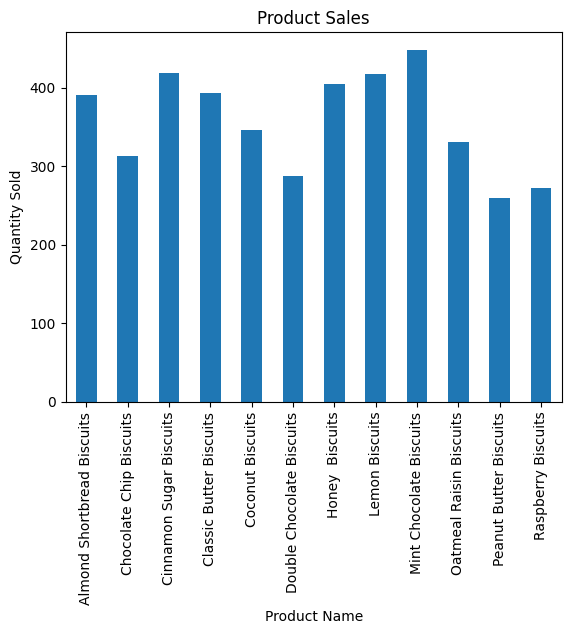

In [60]:
# Calculate the sum of quantities sold for each product
product_sales = sales.groupby('PRODUCT NAME')['QUANTITY'].sum()

# Plot a bar chart for product sales
product_sales.plot.bar()

# Set the plot title and axis labels
plt.title('Product Sales')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')

# Display the bar chart
plt.show()

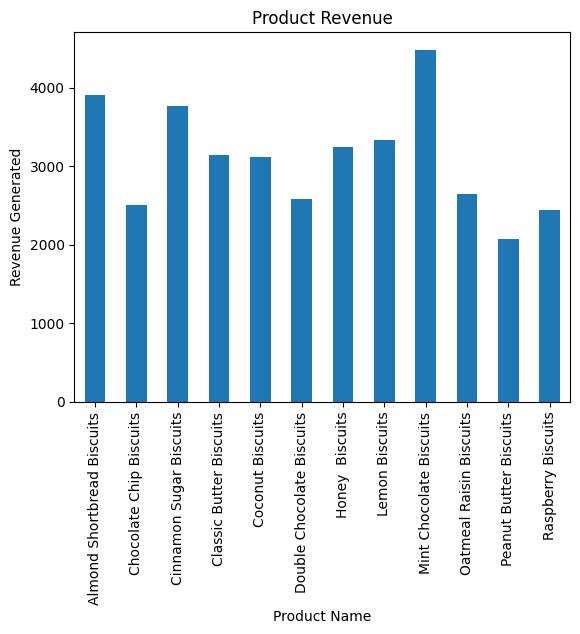

In [66]:
# Calculate the sum of revenue for each product
product_revenue = sales.groupby('PRODUCT NAME')['SALE WORTH'].sum()

# Plot a bar chart for product revenue
product_revenue.plot.bar()


# Set the plot title and axis labels
plt.title('Product Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue Generated')

# Display the bar chart
plt.show()

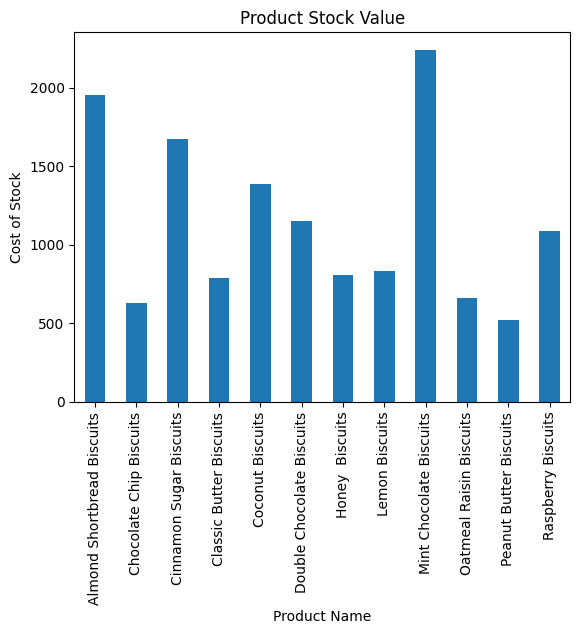

In [64]:
# Calculate the sum of quantities bought for each product
productstock_worth = sales.groupby('PRODUCT NAME')['StockValue'].sum()

# Plot a bar chart for product stock value
productstock_worth.plot.bar()

# Set the plot title and axis labels
plt.title('Product Stock Value')
plt.xlabel('Product Name')
plt.ylabel('Cost of Stock')

# Display the bar chart
plt.show()

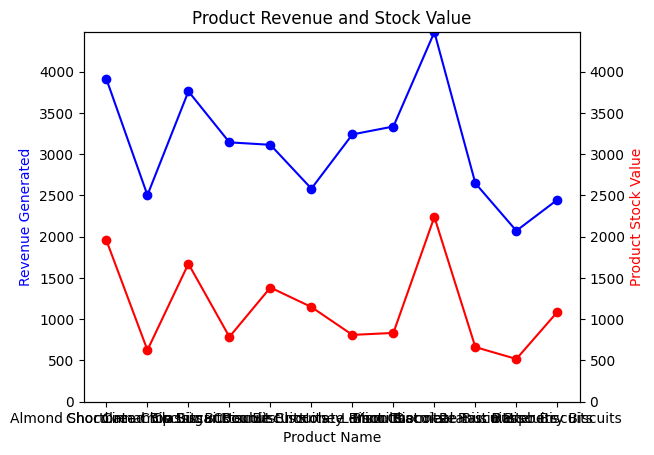

In [73]:


# Calculate the sum of revenue for each product
product_revenue = sales.groupby('PRODUCT NAME')['SALE WORTH'].sum()

# Calculate the sum of quantities bought for each product
productstock_worth = sales.groupby('PRODUCT NAME')['StockValue'].sum()

# Create a figure and axis objects
fig, ax1 = plt.subplots()

# Plot the line graph for Revenue generated
ax1.plot(product_revenue, marker='o', color='blue')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Revenue Generated', color='blue')

# Create a twin y-axis and plot the line graph for product stock value
ax2 = ax1.twinx()
ax2.plot(productstock_worth, marker='o', color='red')
ax2.set_ylabel('Product Stock Value', color='red')

# Set the y-axis range for both y-axes to be the same
max_value = max(product_sales.max(), productstock_worth.max())
ax1.set_ylim(0, max_value)
ax2.set_ylim(0, max_value)


# Set the plot title and display the line graph
plt.title('Product Revenue and Stock Value')
plt.show()

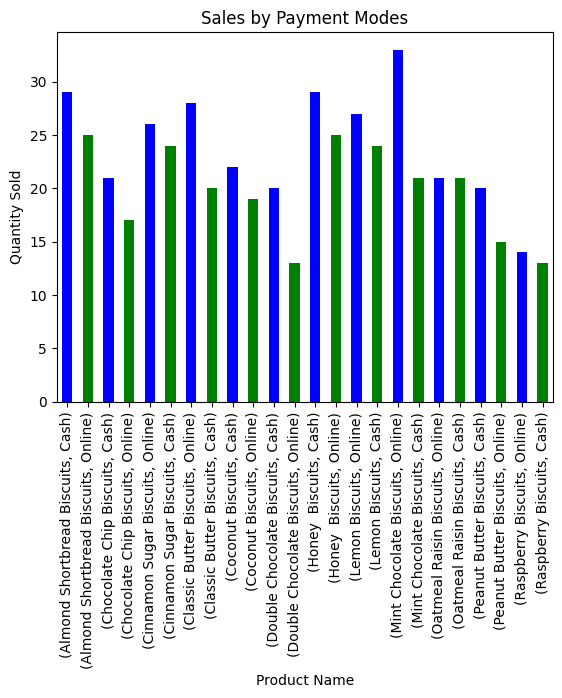

In [79]:
# Calculate the sum of quantities sold for each product
product_sales = sales.groupby('PRODUCT NAME')['QUANTITY'].sum()
Paymentmode_stats = sales.groupby('PRODUCT NAME')['PAYMENT MODE'].value_counts()
# Plot a bar chart for product sales
Paymentmode_stats.plot.bar()

# Plot a bar chart for product sales with different colors
Paymentmode_stats.plot.bar(color=sales['Color'].unique())

# Set the plot title and axis labels
plt.title('Sales by Payment Modes')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')

# Display the bar chart
plt.show()

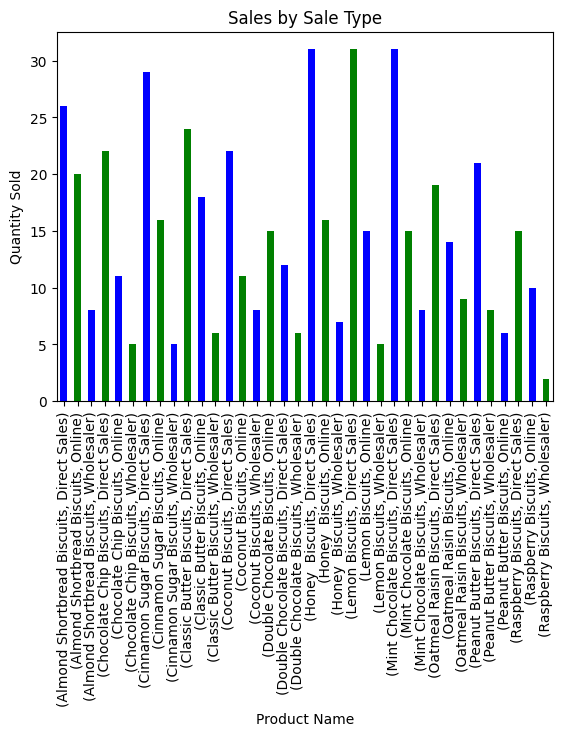

In [80]:
# Calculate the sum of quantities sold for each product
product_sales = sales.groupby('PRODUCT NAME')['QUANTITY'].sum()
saletype_stats = sales.groupby('PRODUCT NAME')['SALE TYPE'].value_counts()
# Plot a bar chart for product sales
saletype_stats.plot.bar()

# Plot a bar chart for product sales with different colors
saletype_stats.plot.bar(color=sales['Color'].unique())

# Set the plot title and axis labels
plt.title('Sales by Sale Type')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')

# Display the bar chart
plt.show()